<a href="https://colab.research.google.com/github/ojobo-tech/gisfordatascience/blob/main/ps1_ai_adoption_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GIS Project on AI Adoption in Governance Across the World**

**Presented by OJOBO AGBO EJE and SHAILESH REDDY DONTHI**

Artificial intelligence leverages computers and machines to mimic the problem-solving and decision-making capabilities of the human mind. With the speedy advancement of Artificial Intelligence, and its proven ability to improve productivity and provide accelerated solutions across different sectors of the economy, it is expected that many countries would have adopted AI in the delivery of public service to their citizens.

Although most developed countries are adopting AI swiflty, research shows that many countries ., especially in Africa and Asia are still behind in the adoption of AI. This could be as a result of many varying factors.

It is also known that the acceptance or adoption of new technology could be affected or influenced by policy made by government for or against the technology.

The goal of this project is to ascertain how ready governments in Africa and Asia are to implement AI in the delivery of public service to their citizens.

Answering this question means measuring the multiple dimension of governmental and technological progress that contribute to AI readiness.

NB: This is an annual project carried out by the United Nations and Oxford Insights. A link to the full report: https://www.oxfordinsights.com/s/Government_AI_Readiness_2022_FV.pdf

Oxford Insights is a U.K based organizations that help governments around the world to increase their impact

In [ ]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis
import seaborn as sns
import plotly.express as px #a quick simple one
import plotly.graph_objects as go #can get convoluted
import numpy as np
!pip install pandas geopandas matplotlib openpyxl
import geopandas as gpd #gis/maps

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

!pip install plotly pandas
import plotly.express as px


from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [ ]:
!pip install mapclassify
import mapclassify #need for thematic map classification

**Data Collection**

The main World Administrative Boundaries shapefile was collected from OpenDataSoft.com

The AI Readiness Index data was collected from OxfordInsights.com

The AI Indicators data was also collected from the UNIDO site


Some variables and their invdividual sources:
Telecommunications Infrastructure: [UN e-Government Survey](https://https://publicadministration.un.org/en/Research/UN-e-Government-Surveys)

Graduates in STEM: [UNESCO](https://http://data.uis.unesco.org/)

AI Papers:

Foundational I.T Infrastructure: [World Bank GovTech Maturity Index](https://https://www.worldbank.org/en/programs/govtech/2022-gtmi)

Open Data: [Global Data Barometer](https://https://globaldatabarometer.org/module/governance/)

Research and Development Spending: [UNESCO](https://http://data.uis.unesco.org/)

Percentage Poverty per Country: [Wikipedia](https://https://colab.research.google.com/github/ojobo-tech/gisfordatascience/blob/main/ps1_ai_adoption_map.ipynb#scrollTo=_DCaty-iA-rp&line=19&uniqifier=1)

In [14]:
#Data showing the country boundaries was collected from Open Data Soft:

! wget -q -O world-administrative-boundaries.zip https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/world-administrative-boundaries/exports/shp?lang=en&timezone=America%2FNew_York
zip_ref = zipfile.ZipFile('world-administrative-boundaries.zip', 'r'); zip_ref.extractall(); zip_ref.close() #To Unzip
wd_map = gpd.read_file('world-administrative-boundaries.shp') #To load the shapefile with gpd as wd_map

<Axes: >

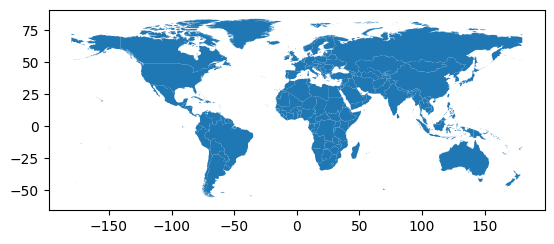

In [15]:
#General Map of the World
wd_map.plot()

**Data Exploration**

We want to explore the type of data for each of the variables from the world map.

In [16]:
wd_map.dtypes

iso3             object
status           object
color_code       object
name             object
continent        object
region           object
iso_3166_1_      object
french_shor      object
geometry       geometry
dtype: object

In [17]:
#pd.set_option('display.max_rows', None)

# Now print the DataFrame
#print(wd_map['name'])

In [18]:
#wd_map.head(2)

In [19]:
#keep it simple!
wd_map=wd_map[['name','geometry']]

In [20]:
#Renaming column, so it matches the data that will be merged
wd_map.rename(columns={'name': 'Country'}, inplace=True)

<ipython-input-20-c7e956c3e55d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [21]:
len(wd_map)

256

Countries under consideration (Mainly Africa and Asia)

In [ ]:
countries_to_keep =  ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad',
                    'Comoros', 'Congo', "CÃ´te d'Ivoire", 'Democratic Republic of the Congo' ,'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia',
                    'Ghana', 'Guinea', 'Guinea Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libyan Arab Jamahiriya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius',
                    'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone',
                    'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Uganda', 'Zambia', 'Zimbabwe','Afghanistan', 'Armenia',
                      'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'Georgia', 'India',
                  'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia',
                  'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Saudi Arabia',
                  'Singapore', 'South Korea', 'Sri Lanka', 'Syria','United Republic of Tanzania', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates',
                  'Uzbekistan', 'Vietnam', 'Yemen']


len(countries_to_keep)
wd_dev_map = wd_map[wd_map['Country'].isin(countries_to_keep)]

100

<Axes: >

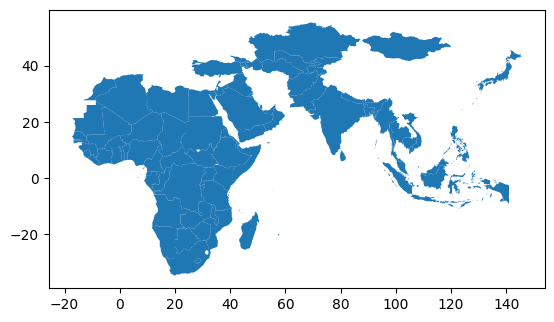

In [ ]:
wd_dev_map.plot() #World Map Based on Boundaries

# **Join/Merging**

**Data to be Merged**

To ascertain the readiness of governments, we will measure certain key indicators that influence AI adoption. To execute this, we got two datasets that we will match with the World Map.

Data_1 - AI Readiness Indicators: https://docs.google.com/uc?id=1DK5kz1eSB7IA24eGKro4gNH7DRyunCGo&export=download


**Data_1 Exploration and Processing**

In [10]:
#Import the Data_1: AI Readiness Indicators

url = 'https://docs.google.com/uc?id=1DK5kz1eSB7IA24eGKro4gNH7DRyunCGo&export=download'
ai_readiness_indicators = pd.read_csv(url, encoding='latin-1')

In [12]:
#Exploring the Data Types of the variables
ai_readiness_indicators.dtypes

Country                                                                    object
AI strategy                                                                 int64
Data protection and privacy laws                                            int64
Cybersecurity                                                             float64
Legal framework's adaptability to digital business models                 float64
Ethical principles                                                          int64
Accountability                                                            float64
Online services                                                           float64
Foundational IT infrastructure                                            float64
Government Promotion of Investment in Emerging Technologies               float64
Government Effectiveness                                                  float64
Government responsiveness to change                                       float64
Procurement Data

In [13]:
ai_readiness_indicators = ai_readiness_indicators[ai_readiness_indicators['Country'].isin(countries_to_keep)]


NameError: ignored

In [ ]:
#Let us remove the unnecesary variables, leaving only the necessary variables
ai_readiness_indicators = ai_readiness_indicators[['Country','Graduates in STEM or computer science','Foundational IT infrastructure','Adoption of Emerging Technologies','AI research papers (log transformation)','Government responsiveness to change','R&D Spending (log transformation)']]

In [ ]:
#Exploring the first 5 Rows
ai_readiness_indicators.head(5)

,Country,Graduates in STEM or computer science,Foundational IT infrastructure,Adoption of Emerging Technologies,AI research papers (log transformation),Government responsiveness to change,R&D Spending (log transformation)
0,Afghanistan,11.25,41.46,NaN,19.68,NaN,NaN
2,Algeria,30.13,49.33,47.15,54.07,48.18,22.99
4,Angola,12.01,43.58,16.41,0.00,31.42,1.71
7,Armenia,17.72,70.50,47.72,14.02,50.59,10.20
10,Azerbaijan,24.16,69.39,62.72,24.25,75.41,10.87


In [ ]:
#Remove Empty Data
ai_readiness_indicators=ai_readiness_indicators.iloc[1:, :]
ai_readiness_indicators.head(5)

#aok so im browsing thru this and bunch of zeros like on AI papers : andorra, angola, etc--strange, not even a single one?

,Country,Graduates in STEM or computer science,Foundational IT infrastructure,Adoption of Emerging Technologies,AI research papers (log transformation),Government responsiveness to change,R&D Spending (log transformation)
2,Algeria,30.13,49.33,47.15,54.07,48.18,22.99
4,Angola,12.01,43.58,16.41,0.00,31.42,1.71
7,Armenia,17.72,70.50,47.72,14.02,50.59,10.20
10,Azerbaijan,24.16,69.39,62.72,24.25,75.41,10.87
12,Bahrain,15.78,74.05,65.71,35.95,70.32,5.18


**Data on Poverty Rate Across the World:**



In [ ]:
#Import the Data on Poverty Rate Across the World
poverty_rate = pd.read_html('https://en.wikipedia.org/wiki/List_of_sovereign_states_by_percentage_of_population_living_in_poverty',match="Country")[0].head(5) #for match use header of col; ideally unique; case may matter
poverty_rate = poverty_rate[poverty_rate['Country'].isin(countries_to_keep)]
poverty_rate

,Country,$1.15,$2.60,$3.85,Year,Continent
1,Algeria,0.32%,2.23%,20.83%,2019,Africa
2,Angola,51.40%,72.79%,89.13%,2019,Africa
4,Armenia,0.40%,6.90%,44.70%,2020,Asia


In [ ]:
# Merge using outer join
wd_map1 = pd.merge(ai_readiness_indicators, poverty_rate, on='Country', how='outer', indicator=True)

# Display specific columns (make sure to assign this to a variable or print it)
result = wd_map1[['Country', '$2.60']]
print(result)

# Merge using inner join to keep exact matches
wd_map7 = pd.merge(ai_readiness_indicators, poverty_rate, on='Country', how='inner', indicator=False)

                             Country   $2.60
0                        Afghanistan     NaN
1                            Algeria   2.23%
2                             Angola  72.79%
3                            Armenia   6.90%
4                         Azerbaijan     NaN
5                            Bahrain     NaN
6                         Bangladesh     NaN
7                              Benin     NaN
8                             Bhutan     NaN
9                           Botswana     NaN
10                      Burkina Faso     NaN
11                           Burundi     NaN
12                        Cabo Verde     NaN
13                          Cambodia     NaN
14                          Cameroon     NaN
15          Central African Republic     NaN
16                              Chad     NaN
17                           Comoros     NaN
18                             Congo     NaN
19  Democratic Republic of the Congo     NaN
20                          Djibouti     NaN
21        

**Data on AI Papers Across the World**

In [ ]:
sheet_id = '1vllmcsRcV0O5x9gE1Kmc1WMxalugU7Sb'
sheet_url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv'

data = pd.read_csv(sheet_url)

In [ ]:
sheet_id = '1vllmcsRcV0O5x9gE1Kmc1WMxalugU7Sb'
sheet_url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv'
df = pd.read_csv(sheet_url)

In [ ]:
df.head(5)

,Rank,Country,Region,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,Asiatic Region,42631,42293,30430,22521,0.71,357
1,2,India,Asiatic Region,23089,22346,10605,5596,0.46,186
2,3,United States,Northern America,13765,13101,11101,3278,0.81,612
3,4,United Kingdom,Western Europe,5132,4816,6097,1180,1.19,334
4,5,Germany,Western Europe,4241,4001,2821,938,0.67,264


In [ ]:
fig = px.choropleth(df,
                    locations=df.columns[1], # assuming first column contains country names
                    locationmode='country names',
                    color=df.columns[4], # assuming second column contains number of AI papers
                    hover_name=df.columns[1],
                    color_continuous_scale="reds",
                    range_color=[0, 42631],# using red color scale
                    title="Number of AI Papers by Country")

fig.show()

The variables/factors that were considered:

1. Graduates in STEM
2. Foundational IT infrastructure
3. Adoption of Emerging Technologies
4. AI research papers
5. Government responsiveness to change
6. R&D Spending
7. Poverty Rate

**ANALYSIS**

**CORRELATION MATRIX**

We are using a correlation matrix to show the correlation coefficients between the different factors we took into consideration.

<ipython-input-201-09aa3d5b2368>:2: FutureWarning:

The default value of numeric_only in GeoDataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

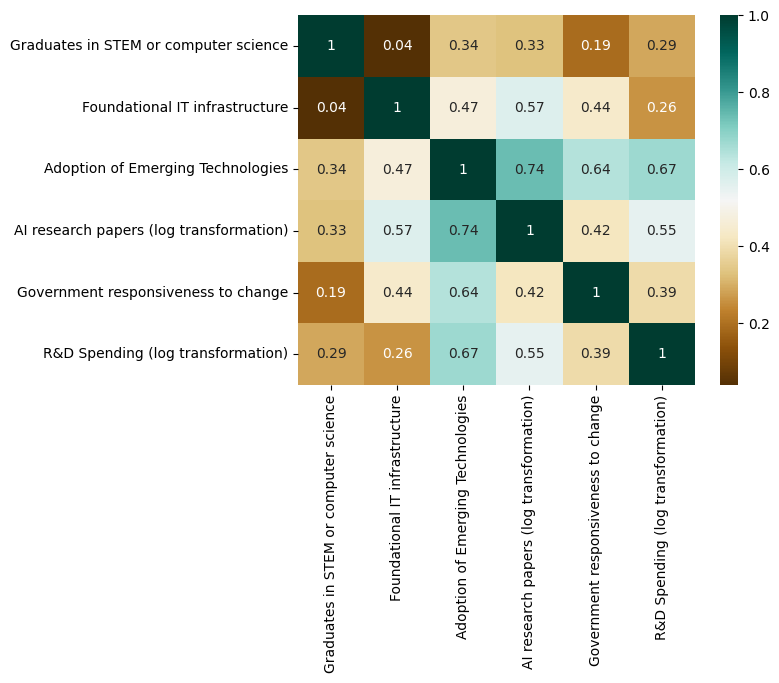

In [ ]:
wd_dev_map1 = pd.merge(wd_dev_map, ai_readiness_indicators, on='Country', how='outer', indicator=True)
sns.heatmap(wd_dev_map1.corr().round(2),cmap="BrBG",annot=True) # RdYlGn love the colors!

**Observation from Correlation Matrix:**

1. There is a strong relationship between AI Papers and Adoption of Emerging Technology. That means if there are more AI papers published, the country will likely be more open to Adopting Emerging Technology.

2. There is not much relationship between the number of Graduates in STEM and a country's Foundational IT Infrastructure and Responsiveness to Change. That means even if a country improves their IT Infrastructure, it doesn't mean it will encourage more students to go into STEM.

**SCATTERPLOT**

We created scatterplots to compare the data sets, visualize their relationships, identify patterns, and detect outliers.

aok: good--interesting not much relationship between the two!, and interesting clusters of countries--top left and bottom right that do not fit the pattern of countries at bottom left and top right--where there is positive relationship

In [ ]:
px.scatter(ai_readiness_indicators, x='Graduates in STEM or computer science', y='Foundational IT infrastructure', color='Adoption of Emerging Technologies',
                  hover_data=['Country'],width=1000,height=600)

**Observation from Scatterplot:**

We found it interesting that there wasn't much relationship between the Foundational IT infrastructure and Graduates in STEM.

Also, the left and bottom right that do not fit the pattern of countries at bottom left and top right--where there is positive relationship

In [ ]:
df = px.data.gapminder().query("year == 2007")
px.treemap(df, path=[px.Constant("world"), 'continent', 'country'], values='pop',
                  color='lifeExp', hover_data=['iso_alpha'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(df['lifeExp'], weights=df['pop']))

**1. Comparing Foundational IT infrastructure and Graduates of STEM**

Foundational IT Infrastructure: How much infrastructure does the country have to support technological advancements.
Graduates in STEM: This is the percentage of people that graduate from STEM as compared to other general programs.

We want to map Foundational IT infrastructure across countries and compare it to the Graduates in STEM, to compare if a country's IT infrastructure influences the number of graduates in STEM.




Merge Foundational IT infrastructure

In [ ]:
# Merge using outer join
wd_dev_map1 = pd.merge(wd_dev_map, ai_readiness_indicators, on='Country', how='outer', indicator=True)

# Display specific columns (make sure to assign this to a variable or print it)
result = wd_dev_map1[['Country', 'Foundational IT infrastructure']]
#print(result)

# Merge using inner join to keep exact matches
wd_dev_map2 = pd.merge(wd_dev_map, ai_readiness_indicators, on='Country', how='inner', indicator=False)


<Axes: >

[]

[]

<Axes: >

[]

[]

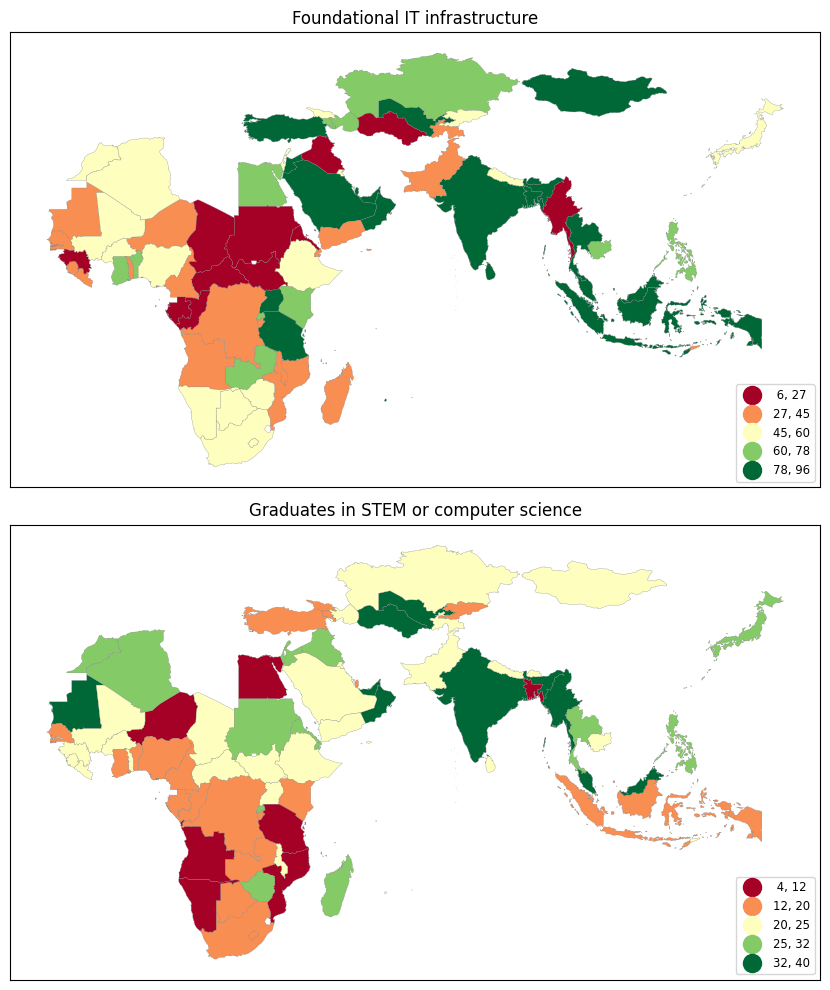

In [ ]:


fig, axs = plt.subplots(2,1, figsize=(10,10),sharey=True, tight_layout=True) #aok maybe better flip this way
wd_dev_map2.plot(ax=axs[0],column='Foundational IT infrastructure',legend=True,cmap='RdYlGn',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[0].title.set_text("Foundational IT infrastructure")
axs[0].set_xticks([]); axs[0].set_yticks([])

wd_dev_map2.plot(ax=axs[1],column='Graduates in STEM or computer science',legend=True,cmap='RdYlGn',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[1].title.set_text("Graduates in STEM or computer science")
axs[1].set_xticks([]); axs[1].set_yticks([])

aok: good to interpret; to take it to the next level start reading scholarly literature about it; eg:
https://scholar.google.com/scholar?hl=en&as_sdt=0%2C31&q=AI+readiness&btnG=
and start writing paper about this

**Observation**

1. Countries in Africa have poor IT infrastructure which also reflects in their low government AI readiness.

2. Although countries like Brazil, Tanzania have good IT infrastructure, it doesn't totally translate to the government's AI readiness.

**3. AI research papers**

We want to map percentage of AI research papers across countries.

First need to get the map with countries (wd_map), then the Data_1 on the AI Readiness Indicator and merge with countries data and finaly color code the polygons.




Merge AI research papers

In [ ]:
wd_map1 = pd.merge(wd_map, ai_readiness_indicators, on='Country', how='outer', indicator=True)
wd_map1._merge.value_counts()#aok need to investigate!

both          167
right_only     13
left_only       1
Name: _merge, dtype: int64

In [ ]:
wd_map1.dtypes

Country                                      object
geometry                                   geometry
Graduates in STEM or computer science       float64
Foundational IT infrastructure              float64
Adoption of Emerging Technologies           float64
AI research papers (log transformation)     float64
Government responsiveness to change         float64
R&D Spending (log transformation)           float64
_merge                                     category
dtype: object

In [ ]:
wd_map1[['_merge','Country', 'R&D Spending (log transformation)']] #and sort on merge to see what failed to merge!

,_merge,Country,R&D Spending (log transformation)
0,both,Uganda,7.16
1,both,Uzbekistan,7.00
2,both,Ireland,43.13
3,both,Eritrea,12.56
4,both,Mongolia,6.71
...,...,...,...
176,right_only,Libya,16.90
177,right_only,North Macedonia,17.13
178,right_only,Republic of Moldova,11.01
179,right_only,United Kingdom,53.51


In [ ]:
# Merge using outer join
wd_map1 = pd.merge(wd_map, ai_readiness_indicators, on='Country', how='outer', indicator=True)

# Display specific columns (make sure to assign this to a variable or print it)
result = wd_map1[['Country', 'AI research papers (log transformation)']]
print(result)

# Merge using inner join to keep exact matches
wd_map5 = pd.merge(wd_map, ai_readiness_indicators, on='Country', how='inner', indicator=False)


                 Country  AI research papers (log transformation)
0                 Uganda                                    21.03
1             Uzbekistan                                    19.68
2                Ireland                                    54.21
3                Eritrea                                     0.00
4               Mongolia                                    14.02
..                   ...                                      ...
176                Libya                                    42.52
177      North Macedonia                                    23.28
178  Republic of Moldova                                    16.27
179       United Kingdom                                    80.09
180             Viet Nam                                    61.18

[181 rows x 2 columns]


<Axes: >

[]

[]

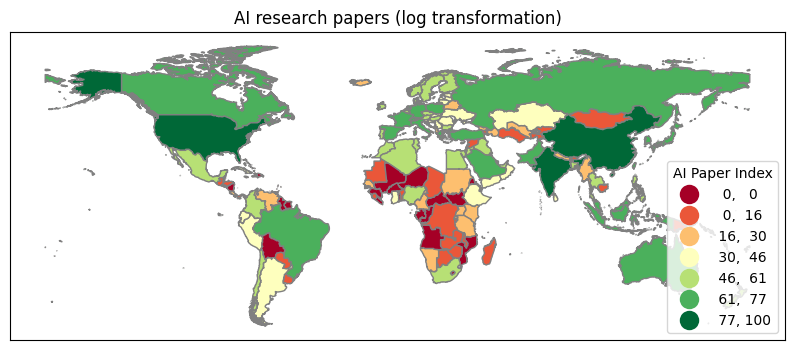

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,20))
wd_map5.plot(ax=ax,column='AI research papers (log transformation)',legend=True,cmap='RdYlGn',
          scheme='natural_breaks',k=7, edgecolor='grey',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('''AI Paper Index''')
ax.title.set_text("AI research papers (log transformation)")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
#ax.set_xlabel('''source/definition: zillow.com/research/data''')
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

aok again this measure looks suspicious--weird a whole country doesnt even have one paper--wonder hows it measured and if can get other measures

**Observation**

1. Overall, regions with low AI readiness index have lower percentage of research papers in AI.

2. Although African countries like Nigeria, Algeria and South Africa have a considerable percentage of AI research papers, they still have a low AI readiness index.

**4. R & D Spending**

We want to map how countries spend in research and development for technology initiatives.

First need to get the map with countries (wd_map), then the Data_1 on the AI Readiness Indicator and merge with countries data and finaly color code the polygons.




Merge AI research papers

In [ ]:
# Merge using outer join
wd_map1 = pd.merge(wd_map, ai_readiness_indicators, on='Country', how='outer', indicator=True)

# Display specific columns (make sure to assign this to a variable or print it)
result = wd_map1[['Country', 'R&D Spending (log transformation)']]
print(result)

# Merge using inner join to keep exact matches
wd_map5 = pd.merge(wd_map, ai_readiness_indicators, on='Country', how='inner', indicator=False)


                 Country  R&D Spending (log transformation)
0                 Uganda                               7.16
1             Uzbekistan                               7.00
2                Ireland                              43.13
3                Eritrea                              12.56
4               Mongolia                               6.71
..                   ...                                ...
176                Libya                              16.90
177      North Macedonia                              17.13
178  Republic of Moldova                              11.01
179       United Kingdom                              53.51
180             Viet Nam                              22.90

[181 rows x 2 columns]


<Axes: >

[]

[]

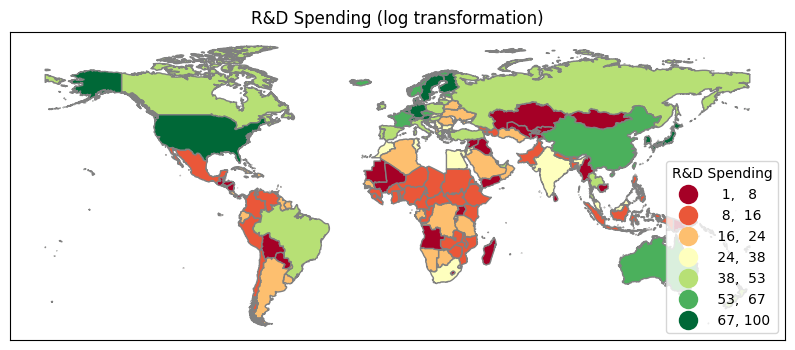

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,20))
wd_map5.plot(ax=ax,column='R&D Spending (log transformation)',legend=True,cmap='RdYlGn',
          scheme='natural_breaks',k=7, edgecolor='grey',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('''R&D Spending''')
ax.title.set_text("R&D Spending (log transformation)")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
#ax.set_xlabel('''source/definition: zillow.com/research/data''')
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

**5. Government Responsivesness to Change**

We want to map Governments Responsivesness to Change across countries. How ready is a government willing to accept a change in policy, technology etc.

First need to get the map with countries (wd_map), then the Data_1 on AI Readiness Indicators and merge with countries data and finaly color code the polygons.


Merge Government's Responsiveness to Change

In [ ]:
# Merge using outer join
wd_dev_map4 = pd.merge(wd_dev_map, ai_readiness_indicators, on='Country', how='outer', indicator=True)

# Display specific columns (make sure to assign this to a variable or print it)
result = wd_dev_map4[['Country', 'Government responsiveness to change']]
print(result)

# Merge using inner join to keep exact matches
wd_map5 = pd.merge(wd_dev_map4, ai_readiness_indicators, on='Country', how='inner', indicator=False)


                             Country  Government responsiveness to change
0                             Uganda                                47.09
1                         Uzbekistan                                44.91
2                            Eritrea                                42.02
3                           Mongolia                                25.91
4   Democratic Republic of the Congo                                24.72
5                         Kazakhstan                                52.98
6                  Equatorial Guinea                                  NaN
7                              Niger                                42.02
8                            Morocco                                50.27
9                           Ethiopia                                41.85
10                           Comoros                                40.85
11                        Kyrgyzstan                                34.60
12                            Kuwait  

KeyError: ignored

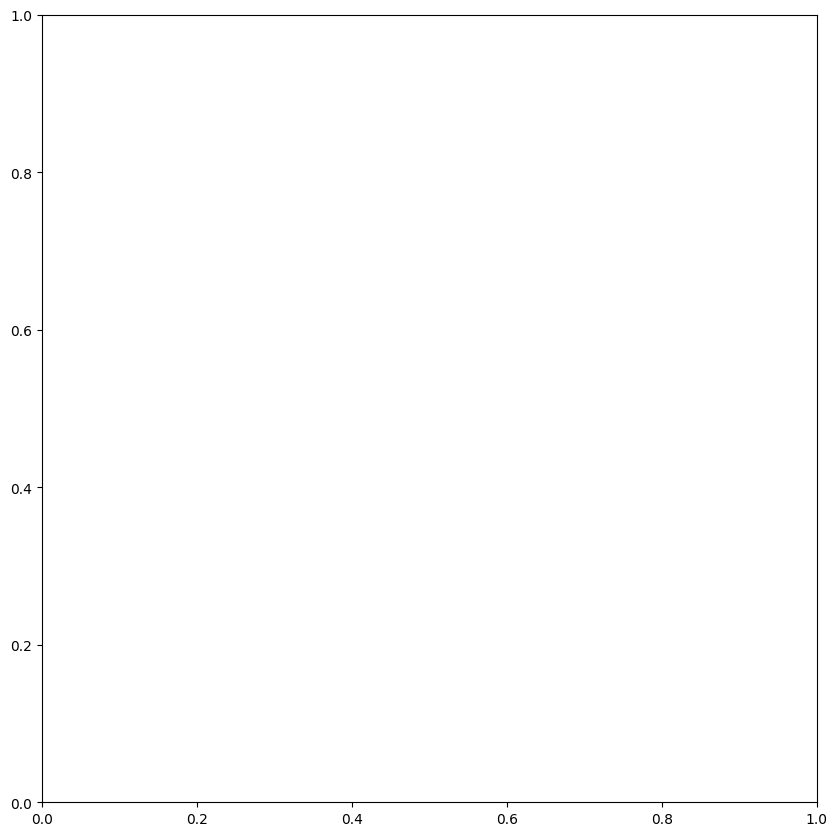

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,20))
wd_map5.plot(ax=ax,column='Government responsiveness to change',legend=True,cmap='RdYlGn',
          scheme='natural_breaks',k=7, edgecolor='grey',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('''Change Index''')
ax.title.set_text("Government Responsiveness to Change")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
#ax.set_xlabel('''source/definition: zillow.com/research/data''')
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

**Observation**

1. Most countries where the government has low responsiveness to change also have a low AI readiness index.

2. Although countries like China, Russia, Brazil have a good AI readiness index, overall, they are not responsive to change. Which speaks to their responsiveness to AI adoption, but not overally policy or political change.

PERCENTAGE OF POVERTY BY COUNTRY

These recommendations are country and region specific which will be reflected in our implementation of our project initiative.

Governments should consider the following:

1. Adopt policies that push for accurate data collection.
2. Adopt AI into some public sector services (in phases)
3. Increase educational funding for STEM programs.
4. Launch initiatives to educate the general populace about the need for AI adoption.
5. Incentivize students going into STEM (scholarships, increased job certainty for STEM profesionals)
6. Invest massively in IT Infrastructures.
7. Fund AI research.
